In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data = pd.read_csv('../datasets/input.csv')
target = pd.read_csv('../datasets/target.csv')

In [4]:
datasets = pd.merge(data, target, on=('국가별', '시점'), how='outer')
datasets.dropna(inplace=True)
datasets.reset_index(inplace=True)
datasets.drop(['국가별', 'index'], axis=1, inplace=True)
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261 entries, 0 to 1260
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시점        1261 non-null   int64  
 1   인당_GDP    1261 non-null   float64
 2   부채비율      1261 non-null   float64
 3   실업률       1261 non-null   float64
 4   상품및서비스수입  1261 non-null   float64
 5   상품및서비스수출  1261 non-null   float64
 6   정치적안정성    1261 non-null   int64  
 7   규제의질      1261 non-null   int64  
 8   경상수지      1261 non-null   float64
 9   신용등급점수    1261 non-null   float64
dtypes: float64(7), int64(3)
memory usage: 98.6 KB


In [5]:
lb = LabelEncoder()
datasets['시점'] = lb.fit_transform(datasets['시점'])
datasets.describe()

,시점,인당_GDP,부채비율,실업률,상품및서비스수입,상품및서비스수출,정치적안정성,규제의질,경상수지,신용등급점수
count,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000
mean,7.505155,22012.779330,55.695265,7.113140,4.170044,3.660556,54.612213,67.015860,-1.326674,12.526324
std,4.603761,22939.181148,37.783440,4.499929,10.071854,9.109875,27.897707,23.512842,7.070186,5.288810
min,0.000000,333.731576,-3.400000,0.210000,-50.275895,-56.736571,0.000000,6.000000,-41.526871,0.000000
25%,4.000000,4379.658787,30.300000,4.120000,0.200224,0.259701,29.000000,48.000000,-4.754963,8.000000
50%,8.000000,12808.038340,47.100000,6.120000,4.560764,4.075288,58.000000,70.000000,-1.742977,12.500000
75%,11.000000,36323.447740,70.780000,8.480000,9.093538,7.668103,79.000000,88.000000,2.367691,17.000000
max,15.000000,123514.196700,266.200000,31.110000,66.893243,86.043298,100.000000,100.000000,27.397650,20.000000


In [6]:
x_train, x_test, y_train, y_test = train_test_split(datasets.iloc[:,:9], datasets.iloc[:,9], test_size=0.2, random_state=42)

In [8]:
alphas = [100, 10, 1, 0.1, 0.01, 0.001]

In [9]:
## alpha 값마다 결과 출력
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(x_train, y_train)
    pred = lasso.predict(x_test)
    mse = mean_squared_error(pred, y_test)
    rmse = np.sqrt(mse)
    r2 = r2_score(pred, y_test)
    print('alpha : {0}\nmse : {1}\nrmse : {2}\nr2 : {3}\n'.format(alpha, mse, rmse, r2))

alpha : 100
mse : 11.785625899012043
rmse : 3.43301993862722
r2 : 0.2972179232587955

alpha : 10
mse : 5.510851625681844
rmse : 2.347520314221337
r2 : 0.7238882743775722

alpha : 1
mse : 4.257098505578897
rmse : 2.06327373500922
r2 : 0.8153334534743608

alpha : 0.1
mse : 4.04498249047127
rmse : 2.011214183141932
r2 : 0.8288677625005645

alpha : 0.01
mse : 4.026292827623195
rmse : 2.0065624404994713
r2 : 0.8302154473915473

alpha : 0.001
mse : 4.024574569053874
rmse : 2.0061342350535454
r2 : 0.8303444364443262



In [10]:
## 0.01과 0.0001이 많이 차이나지 않아 0.01로 확인
lasso = Lasso(alpha=0.01)
lasso.fit(x_train, y_train)
pred = lasso.predict(x_test)
mse = mean_squared_error(pred, y_test)
rmse = np.sqrt(mse)
r2 = r2_score(pred, y_test)
print(f'mse : {mse} \nrmse : {rmse} \nr2 : {r2} \ncoef : {lasso.coef_} \nintercept : {lasso.intercept_}')

mse : 4.026292827623195 
rmse : 2.0065624404994713 
r2 : 0.8302154473915473 
coef : [-6.56110545e-02  5.17418797e-05 -1.49182018e-02 -1.09094009e-01
  6.73484203e-03 -1.95971504e-02 -9.82905549e-03  1.65051004e-01
  8.79891625e-02] 
intercept : 3.087175077745812


<AxesSubplot:>

d:\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


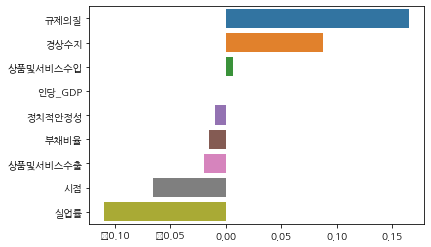

In [11]:
coef_ = pd.Series(lasso.coef_, index=x_train.columns)
coef_sort = coef_.sort_values(ascending=False)
plt.rcParams['font.family'] = 'NanumGothic'
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [12]:
ss = StandardScaler()
x_train_ss = ss.fit_transform(x_train)
x_test_ss = ss.fit_transform(x_test)

lasso = Lasso(alpha=0.01)
lasso.fit(x_train_ss, y_train)
pred = lasso.predict(x_test_ss)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)
print(f'mse : {mse} \nrmse : {rmse} \nr2 : {r2} \ncoef : {lasso.coef_} \nintercept : {lasso.intercept_}')

mse : 4.028311081431592 
rmse : 2.007065290774466 
r2 : 0.8549624890899095 
coef : [-0.29347356  1.16842431 -0.55244742 -0.49412533  0.03723462 -0.15149807
 -0.23435059  3.846121    0.60498068] 
intercept : 12.526770833333334


<AxesSubplot:>

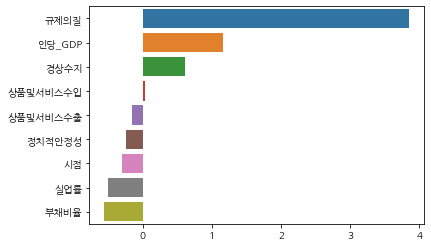

In [13]:
coef_ = pd.Series(lasso.coef_, index=x_train.columns)
coef_sort = coef_.sort_values(ascending=False)
plt.rcParams['font.family'] = 'NanumGothic'
sns.barplot(x=coef_sort.values, y=coef_sort.index)

#### 모델 별 계수 확인

In [16]:
lasso100 = Lasso(alpha=100, max_iter=10000).fit(x_train_ss, y_train)
lasso1 = Lasso(alpha=1, max_iter=10000).fit(x_train_ss, y_train)
lasso01 = Lasso(alpha=0.1, max_iter=10000).fit(x_train_ss, y_train)
lasso001 = Lasso(alpha=0.01, max_iter=10000).fit(x_train_ss, y_train)
lasso0001 = Lasso(alpha=0.001, max_iter=10000).fit(x_train_ss, y_train)

Text(0.5, 0, '계수 크기')

d:\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


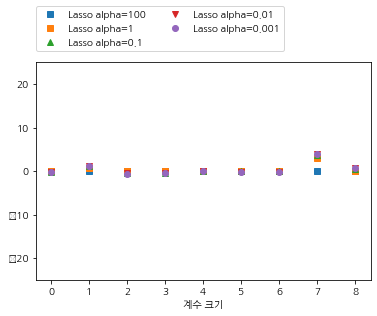

In [18]:
plt.plot(lasso100.coef_,'s',  label='Lasso alpha=100')
plt.plot(lasso1.coef_,'s',  label='Lasso alpha=1')
plt.plot(lasso01.coef_, '^', label='Lasso alpha=0.1')
plt.plot(lasso001.coef_, 'v', label='Lasso alpha=0.01')
plt.plot(lasso0001.coef_, 'o', label='Lasso alpha=0.001')
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.rcParams['font.family'] = 'NanumGothic'
plt.xlabel('계수 목록')
plt.xlabel('계수 크기')